In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as k

In [ ]:
import matplotlib as mtl
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import LeakyReLU,Activation,Input,Dropout,MaxPool2D,Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import cv2

In [ ]:
df_train=pd.read_csv("/content/drive/My Drive/dataset/mnist_train.csv")
df_test=pd.read_csv("/content/drive/My Drive/dataset/mnist_test.csv")

In [ ]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.random.seed(1)
df_train=df_train.iloc[np.random.permutation(len(df_train))]

In [ ]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
15281,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21435,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44536,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13518,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47529,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.shape

(60000, 785)

In [ ]:
sample_size=df_train.shape[0]

In [ ]:
validation_size=int(df_train.shape[0]*0.1)
train_x=np.asarray(df_train.iloc[:sample_size-validation_size,1:]).reshape([sample_size-validation_size,28,28,1])

In [ ]:
train_y=np.asarray(df_train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1])

In [ ]:
val_x=np.asarray(df_train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
val_y=np.asarray(df_train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])
print(val_x.shape,val_y.shape)

(6000, 28, 28, 1) (6000, 1)


In [ ]:
train_x.shape,train_y.shape

((54000, 28, 28, 1), (54000, 1))

In [ ]:
test_size=df_test.shape[0]
test_x=np.asarray(df_test.iloc[:test_size,1:]).reshape([test_size,28,28,1])
test_y=np.asarray(df_test.iloc[:test_size,0]).reshape([test_size,1])
print(val_x.shape,val_y.shape)

(6000, 28, 28, 1) (6000, 1)


In [ ]:
train_x=train_x/255
val_x=val_x/255
test_x=test_x/255

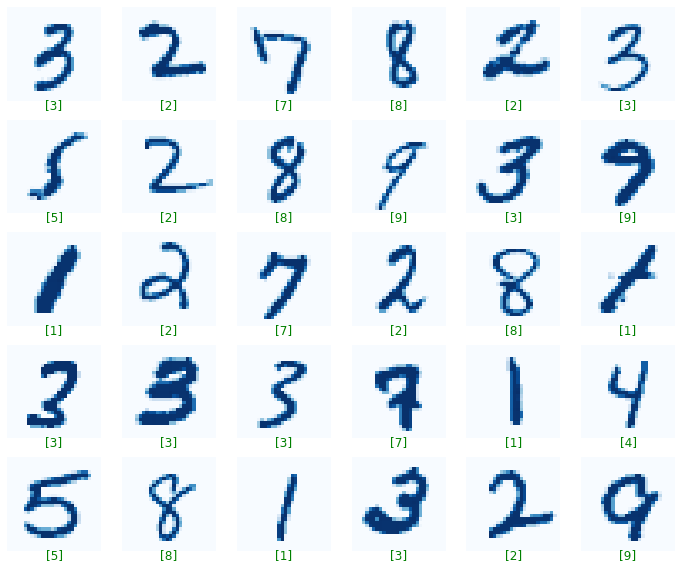

In [ ]:
rows=5
cols=6
f=plt.figure(figsize=(2*cols,2*rows))
for i in range(cols*rows):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(train_x[i].reshape([28,28]),cmap="Blues")
    plt.axis("off")
    plt.title(str(train_y[i]),y=-0.15,color="green")

In [ ]:
model=k.models.Sequential()

In [ ]:
model.add(Conv2D(32,3,padding="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3,padding="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(64,3,padding="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3,padding="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="sigmoid"))

In [ ]:
initial_lr=0.001
loss="sparse_categorical_crossentropy"
model.compile(Adam(lr=initial_lr),loss=loss,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [ ]:
epochs=20
batch_size=256
print(train_x.shape,train_y.shape)
history_1=model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,validation_data=[val_x,val_y])

(54000, 28, 28, 1) (54000, 1)
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 16s 303us/step - loss: 0.3313 - accuracy: 0.8966 - val_loss: 0.0915 - val_accuracy: 0.9725
Epoch 2/20
54000/54000 [==============================] - 10s 181us/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.0580 - val_accuracy: 0.9805
Epoch 3/20
54000/54000 [==============================] - 10s 182us/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 4/20
54000/54000 [==============================] - 10s 179us/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0382 - val_accuracy: 0.9892
Epoch 5/20
54000/54000 [==============================] - 10s 179us/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 6/20
54000/54000 [==============================] - 10s 179us/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0342 - val_accuracy: 0.9903
Epoch 7/20
54000/54000 [===

In [ ]:
preds=model.evaluate(x=test_x,y=test_y)

10000/10000 [==============================] - 1s 144us/step


In [ ]:
print("Loss="+str(preds[0]))

Loss=0.03257545903229111


In [ ]:
print("Test accuracy="+str(preds[1]))

Test accuracy=0.9925000071525574


In [ ]:
test_y=np.argmax(model.predict(test_x),axis=1)

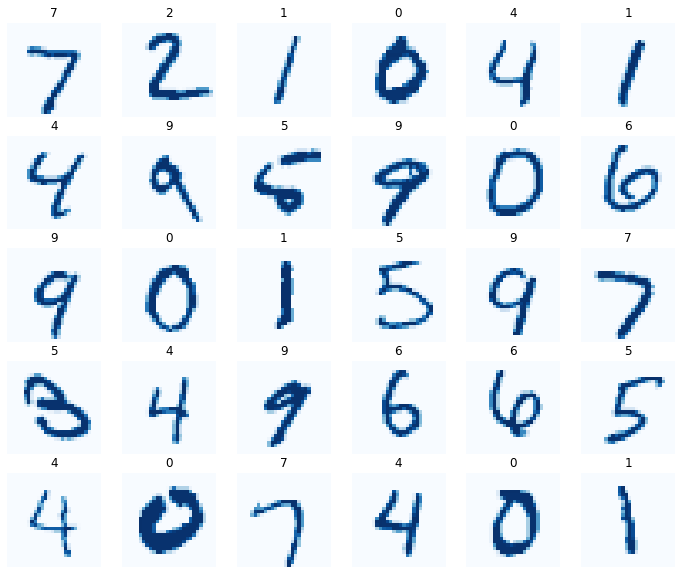

In [ ]:
rows=5
cols=6
f=plt.figure(figsize=(2*cols,2*rows))
for i in range(rows*cols):
  f.add_subplot(rows,cols,i+1)
  plt.imshow(test_x[i].reshape(28,28),cmap="Blues")
  plt.axis("off")
  plt.title(test_y[i])

Text(0.5, 0, 'epoch')

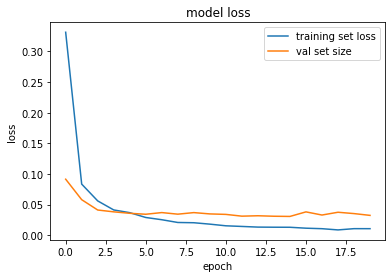

In [ ]:
plt.plot(history_1.history['loss'],label="training set loss")
plt.plot(history_1.history['val_loss'],label="val set size")
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
print(history_1.history['loss'])

[0.33129128478633035, 0.08343247184488509, 0.05601701306965616, 0.04125393614393694, 0.03682320755885707, 0.02894618343423914, 0.02529685856319136, 0.020799405691800294, 0.020381175408760707, 0.01808257910222919, 0.015380372243346992, 0.014334855613747128, 0.013257044208615466, 0.01306310565162588, 0.012979893375326085, 0.011481388740517476, 0.010660604651879381, 0.00866235272710522, 0.010714872935372922, 0.010685738280691482]


In [ ]:
image_path="/content/drive/My Drive/sample images/bwimage.png"
img=np.asarray(image.load_img(image_path,target_size=(28,28)))

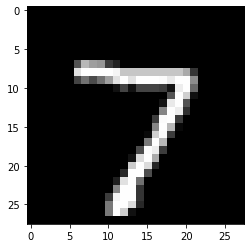

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(28, 28, 3)

In [ ]:
img=np.mean(img,axis=2)

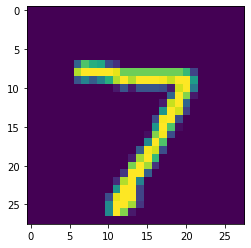

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img=np.reshape(img,(1,28,28,1))

In [ ]:
img.shape

(1, 28, 28, 1)

In [ ]:
np.argmax(model.predict(img))

7